#📔 Customer Analytics

This noteboook focuses on performing customer segmentation and involves the application of hierarchical and flat clustering techniques for dividing customers into groups


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

In [2]:
#load data

df = pd.read_csv("https://raw.githubusercontent.com/AlinaDbeep/customer-segmentation/main/segmentation%20data.csv", index_col=0)

In [3]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


### Data Exploration and Correlation Estimate
Let's have a look at and explore our data before doing the actual clustering. Here is the link to all data [legends](https://www.dropbox.com/s/aeempuvpqy9kjz0/segmentation%20data%20legend.xlsx?dl=0), and here are some features:

📍Sex:
* 0	male							
* 1	female


📍Marital Status:
* 0	single							
* 1	non-single (divorced / separated / married / widowed)


📍Education:
* 0 other / unknown							
* 1	high school							
* 2	university							
* 3	graduate school	


📍Occupation:
* 0	unemployed / unskilled						
* 1	skilled employee / official						
* 2	management / self-employed / highly qualified employee / officer



📍Settlement size:
* 0	small city							
* 1	mid-sized city							
* 2	big city

In [4]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [5]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


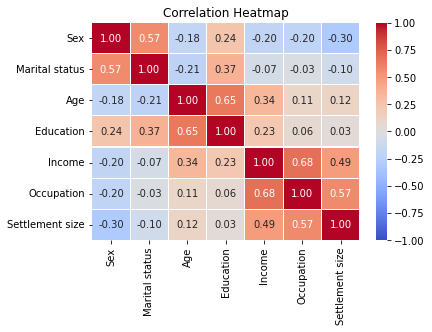

In [6]:
ax = sns.heatmap(df.corr(), 
                 linewidth=0.1, 
                 annot=True, 
                 fmt=".2f", 
                 cmap="coolwarm",
                 vmax=1,
                 vmin=-1)
plt.title("Correlation Heatmap")
plt.show()


No wonder that we see a correlation between occupation and settlement size, income and settlement size and occupation, and age and education

In [7]:
sex =df.Sex.value_counts()
sex.head()

0    1086
1     914
Name: Sex, dtype: int64

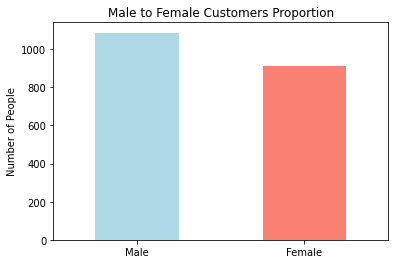

In [8]:
sex.plot(kind="bar", color=["lightblue", "salmon"])
plt.title("Male to Female Customers Proportion")
plt.ylabel("Number of People")
plt.xticks([0, 1],
           ["Male", "Female"],
           rotation=0);

There are slightly more men than women among customers

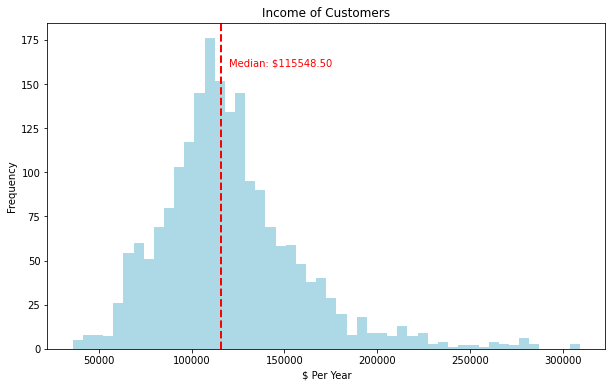

In [9]:
df.Income.plot.hist(bins=50, color="lightblue", figsize=(10, 6))
plt.title("Income of Customers")
plt.xlabel("$ Per Year")
plt.ylabel("Frequency")

plt.axvline(df.Income.median(), color='red', linestyle='dashed', linewidth=2)
plt.text(df.Income.median()*1.04, 160, "Median: ${:.2f}".format(df.Income.median()), color="red");

Let's also have a look at correlation between age and income with regard to occupation


Category of occupation of the customer:					
* 0	unemployed / unskilled (purple)					
* 1	skilled employee / official (green)
* 2	management / self-employed / highly qualified employee / officer (yellow)

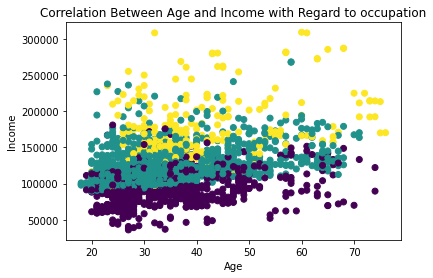

In [10]:
plt.scatter(x=df.Age, y=df.Income, c=df.Occupation)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Correlation Between Age and Income with Regard to occupation");

###Standardization

Why do we need it?

 * *In practice, we often encounter different types of variables in the same dataset. A significant issue is that the range of the variables may differ a lot. Using the original scale may put more weights on the variables with a large range. In order to deal with this problem, we need to apply the technique of features rescaling to independent variables or features of data in the step of data pre-processing. [(link)](https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)*

In [11]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

###Hierarchical Clustering

In [12]:
hier_clust = linkage(df_std, method="ward")

#Ward Linkage Method
#Instead of measuring the distance directly, it analyzes the variance of clusters.

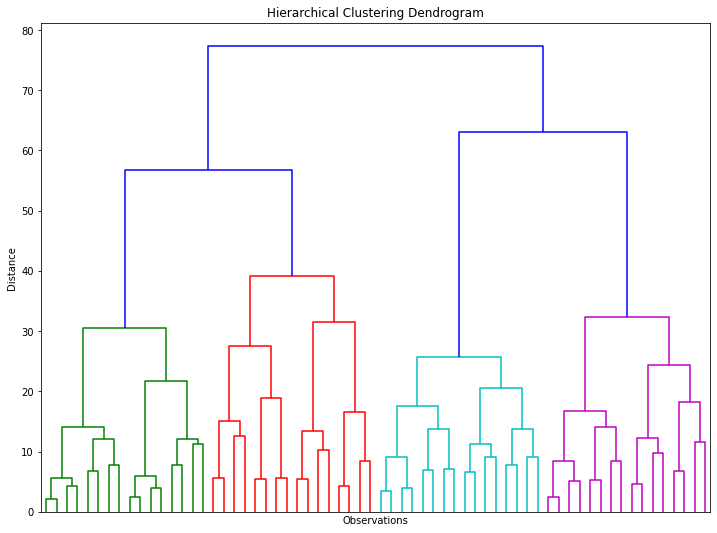

In [13]:
plt.figure(figsize=(12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hier_clust,
           truncate_mode = "level",
           p=5,
           show_leaf_counts=False,
           no_labels = True)

plt.show()

###K-means Clustering

K-means clustering is a simple unsupervised learning algorithm that is used to solve clustering problems. It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand. The clusters are then positioned as points and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached. [ (source)](https://www.techopedia.com/definition/32057/k-means-clustering)

In [14]:
#WCSS (Within Cluster Sum of Squares) is the sum of squared distance between each point and the centroid in a cluster.
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init="k-means++", random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)  #inertia_ :  Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

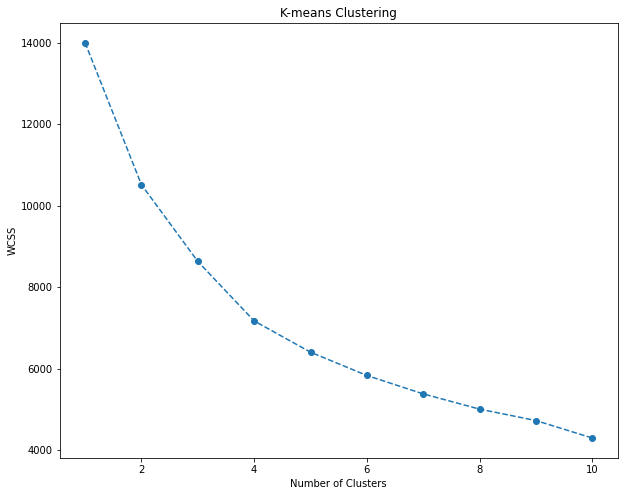

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering")
plt.show()


4 clusters seem most optimal

In [16]:
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=42)

In [17]:
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [18]:
kmeans.labels_

array([0, 2, 1, ..., 1, 2, 1], dtype=int32)

###Results

In [19]:
df_segm_kmeans = df.copy()
df_segm_kmeans["Segment K-means"] = kmeans.labels_

In [20]:
df_segm_kmeans["Segment K-means"]

ID
100000001    0
100000002    2
100000003    1
100000004    3
100000005    3
            ..
100001996    1
100001997    2
100001998    1
100001999    2
100002000    1
Name: Segment K-means, Length: 2000, dtype: int32

In [21]:
df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,2
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,3
100000005,0,0,53,1,149031,1,1,3


In [22]:
df_segm_analysis = df_segm_kmeans.groupby(["Segment K-means"]).mean()

In [23]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [24]:
df_segm_analysis["Number of Observations"] = df_segm_kmeans[["Segment K-means", "Sex"]].groupby(["Segment K-means"]).count()
df_segm_analysis["Proportion of Observations"] = df_segm_analysis["Number of Observations"]/df_segm_analysis["Number of Observations"].sum()

In [25]:
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Observations,Proportion of Observations
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [26]:
df_segm_analysis.rename({0:"well-off",
                         1:"fewer-opportunities",
                         2:"standard",
                         3:"career-focused"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Number of Observations,Proportion of Observations
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [27]:
df_segm_kmeans["Labels"] = df_segm_kmeans["Segment K-means"].map({0:"well-off",
                                                                  1:"fewer-opportunities",
                                                                  2:"standard",
                                                                  3:"career-focused"})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


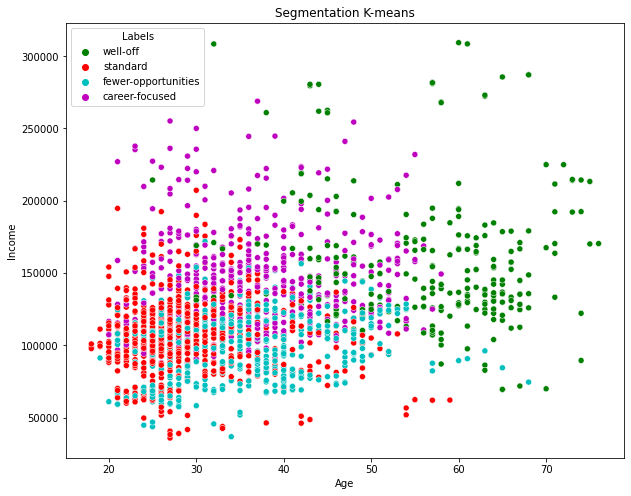

In [28]:
x_axis = df_segm_kmeans["Age"]
y_axis = df_segm_kmeans["Income"]
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans["Labels"], palette = ["g", 'r', 'c', 'm'])
plt.title("Segmentation K-means")
plt.show();

###PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible. [(source)](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

In [29]:
pca = PCA()

In [30]:
pca.fit(df_std)

PCA()

In [31]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Variance')

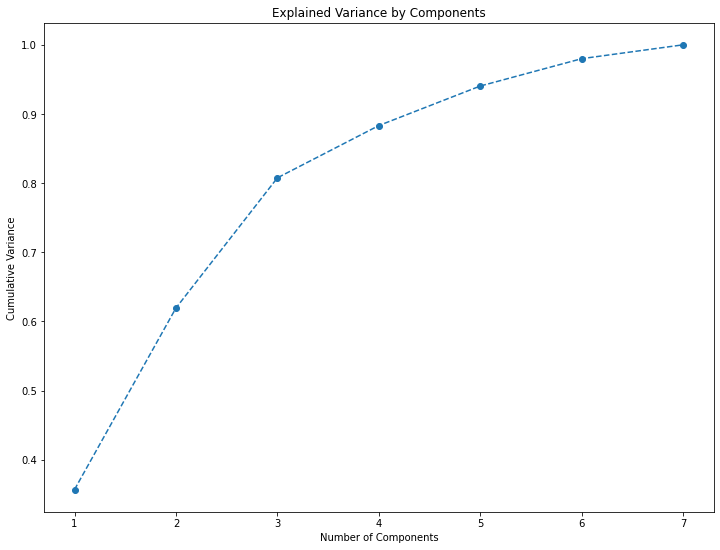

In [32]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle="--")
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")

In [33]:
pca = PCA(n_components=3)

In [34]:
pca.fit(df_std)

PCA(n_components=3)

###PCA Results

In [35]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [36]:
df_pca_com = pd.DataFrame(data=pca.components_, 
                          columns = df.columns.values,
                          index=["Component 1", "Component 2", "Component 3"])

df_pca_com

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


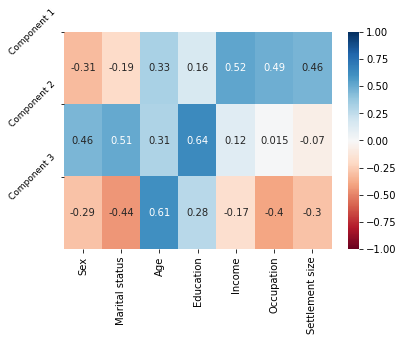

In [37]:
sns.heatmap(df_pca_com, 
            vmin= -1,
            vmax=1,
            cmap="RdBu",
            annot=True)
plt.yticks([0,1,2],
           ["Component 1", "Component 2", "Component 3"],
           rotation=45,
           fontsize=9);

In [38]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [39]:
scores_pca = pca.transform(df_std)

###K-means clustering with PCA

In [40]:
#This time we use scores_pca. Component scores and standardized by definition
wcss = []
for i in range(1,11):
  kmeans_pca =KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

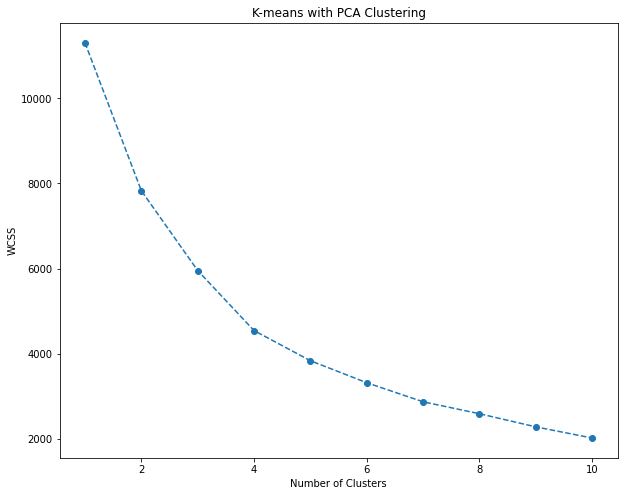

In [41]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker="o", linestyle="--")
plt.ylabel("WCSS")
plt.xlabel("Number of Clusters")
plt.title("K-means with PCA Clustering")
plt.show()

In [42]:
kmeans_pca=KMeans(n_clusters=4, init="k-means++", random_state=42)

In [43]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

###K-means clustering with PCA Results

In [44]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ["Component 1", "Component 2", "Component 3"]
df_segm_pca_kmeans["Segment K-means PCA"] = kmeans_pca.labels_

In [45]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [46]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(["Segment K-means PCA"]).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [47]:
df_segm_pca_kmeans_freq["Number of Observations"] = df_segm_pca_kmeans[["Segment K-means PCA", "Sex"]].groupby(["Segment K-means PCA"]).count()
df_segm_pca_kmeans_freq["Proportion of Observations"] = df_segm_pca_kmeans_freq["Number of Observations"]/df_segm_pca_kmeans_freq["Number of Observations"].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:"standard",
                                                          1:"career-focused",
                                                          2:"fewer opportunities",
                                                          3:"well-off"})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Number of Observations,Proportion of Observations
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [48]:
df_segm_pca_kmeans["Legend"] = df_segm_pca_kmeans["Segment K-means PCA"].map({0:"standard",
                                                          1:"career-focused",
                                                          2:"fewer opportunities",
                                                          3:"well-off"})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


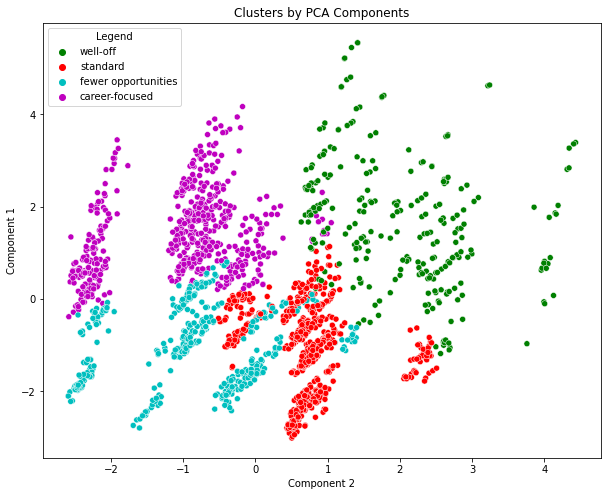

In [49]:
x_axis = df_segm_pca_kmeans["Component 2"] #lifestyle
y_axis = df_segm_pca_kmeans["Component 1"] #career focus
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans["Legend"], palette=["g","r","c","m"])
plt.title("Clusters by PCA Components")
plt.show()

###Data Export

In [50]:
pickle.dump(scaler, open("scaler.pickle", "wb")) #wb=Write Bytes

In [51]:
pickle.dump(pca, open("pca.pickle", "wb"))

In [52]:
pickle.dump(kmeans_pca, open("kmeans_pca.pickle", "wb"))